In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/cleaned/yellow_tripdata_2016-01_cleaned.csv")

print(df.shape)
df.head()


(10842602, 26)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,tolls_amount,improvement_surcharge,total_amount,pickup_hour,pickup_day,pickup_month,pickup_quarter,trip_duration_min,revenue_per_mile,tip_percentage
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,...,0.0,0.3,8.8,0,Friday,1,1,0.0,8.000000,0.0
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,...,0.0,0.3,19.3,0,Friday,1,1,0.0,3.938776,0.0
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,...,0.0,0.3,34.3,0,Friday,1,1,0.0,3.254269,0.0
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,...,0.0,0.3,17.3,0,Friday,1,1,0.0,3.642105,0.0
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,...,0.0,0.3,8.8,0,Friday,1,1,0.0,5.000000,0.0


In [2]:
total_revenue = df["total_amount"].sum()
print("Total Revenue:", round(total_revenue, 2))


Total Revenue: 168984784.17


In [5]:
avg_fare = df["fare_amount"].mean()
print("Average Fare:", round(avg_fare, 2))


Average Fare: 12.44


In [6]:
avg_distance = df["trip_distance"].mean()
print("Average Trip Distance:", round(avg_distance, 2))


Average Trip Distance: 4.68


In [9]:
avg_tip_pct = df["tip_percentage"].mean()
print("Average Tip %:", round(avg_tip_pct, 2))


Average Tip %: 14.96


In [10]:
avg_revenue_per_mile = df["revenue_per_mile"].mean()
print("Revenue per Mile:", round(avg_revenue_per_mile, 2))


Revenue per Mile: 8.3


In [11]:
trips_per_hour = df.groupby("pickup_hour").size()
trips_per_hour


pickup_hour
0     393141
1     297894
2     227194
3     167249
4     123783
5     109979
6     234342
7     402362
8     489186
9     489595
10    478291
11    500092
12    532627
13    528937
14    559577
15    560633
16    507992
17    588362
18    688591
19    679654
20    621286
21    604963
22    578263
23    478609
dtype: int64

In [12]:
peak_hours = df[df["pickup_hour"].between(7, 10) | df["pickup_hour"].between(16, 19)]
off_peak_hours = df[~df.index.isin(peak_hours.index)]

print("Peak Trips:", len(peak_hours))
print("Off-Peak Trips:", len(off_peak_hours))


Peak Trips: 4324033
Off-Peak Trips: 6518569


In [13]:
df['pickup_date'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.date
daily_revenue = df.groupby('pickup_date')['total_amount'].sum().sort_values(ascending=False).head(10)
print("Top 10 Highest Revenue Days:\n", daily_revenue)

Top 10 Highest Revenue Days:
 pickup_date
2016-01-29    6573893.40
2016-01-30    6479573.72
2016-01-22    6423231.18
2016-01-15    6387392.72
2016-01-21    6385322.78
2016-01-28    6299201.00
2016-01-14    6203133.10
2016-01-20    6044116.67
2016-01-19    6041068.16
2016-01-16    6024118.82
Name: total_amount, dtype: float64


In [ ]:

df['pickup_lat_rounded'] = df['pickup_latitude'].round(3)
df['pickup_long_rounded'] = df['pickup_longitude'].round(3)

zone_revenue = df.groupby(['pickup_lat_rounded', 'pickup_long_rounded'])['total_amount'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Zones by Revenue (Coordinates):\n", zone_revenue)

peak_metrics = peak_hours.agg({
    'total_amount': ['sum', 'mean'],
    'trip_distance': 'mean'
}).rename(columns={'total_amount': 'peak_revenue', 'trip_distance': 'peak_distance'})

print("\nPeak Hour Performance:\n", peak_metrics)


Top 10 Zones by Revenue (Coordinates):
 pickup_lat_rounded  pickup_long_rounded
40.645              -73.782                3010204.68
0.000                0.000                 2477005.26
40.645              -73.777                2040297.90
40.774              -73.871                1893932.58
                    -73.873                1873747.77
40.769              -73.863                1597470.20
40.770              -73.864                1436513.25
40.647              -73.790                1280327.45
40.644              -73.790                1139599.84
40.770              -73.863                1132055.99
Name: total_amount, dtype: float64

Peak Hour Performance:
       peak_revenue  peak_distance
sum   6.577478e+07            NaN
mean  1.521144e+01       3.903842


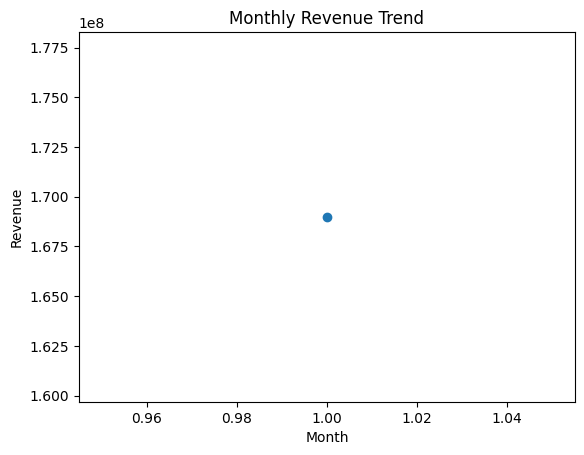

In [15]:
monthly_revenue = df.groupby("pickup_month")["total_amount"].sum()

plt.figure()
monthly_revenue.plot(kind="line", marker="o")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()


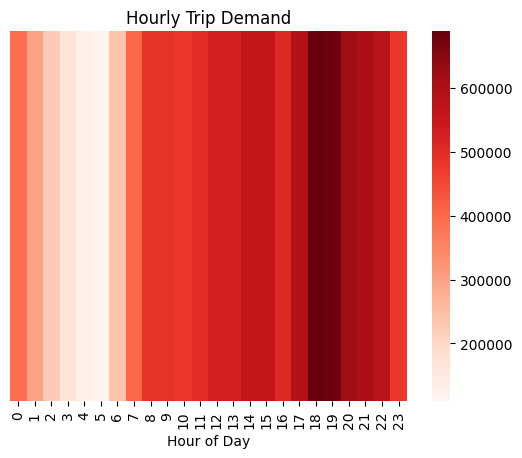

In [16]:
hourly_demand = df.groupby("pickup_hour").size()

plt.figure()
sns.heatmap(hourly_demand.values.reshape(1, -1), cmap="Reds", cbar=True)
plt.xlabel("Hour of Day")
plt.title("Hourly Trip Demand")
plt.yticks([])
plt.show()


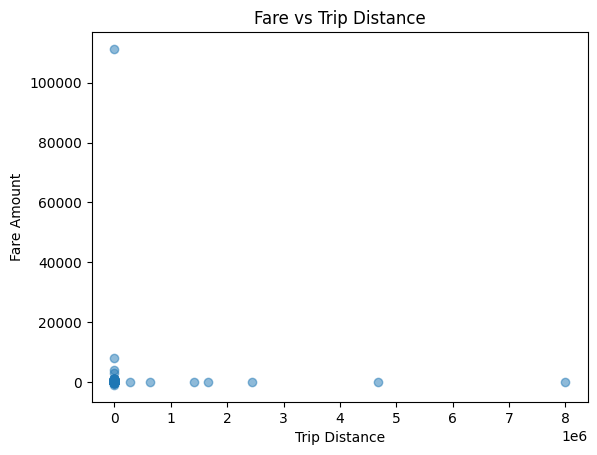

In [18]:
plt.figure()
plt.scatter(df["trip_distance"], df["fare_amount"], alpha=0.5)
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Fare vs Trip Distance")
plt.show()


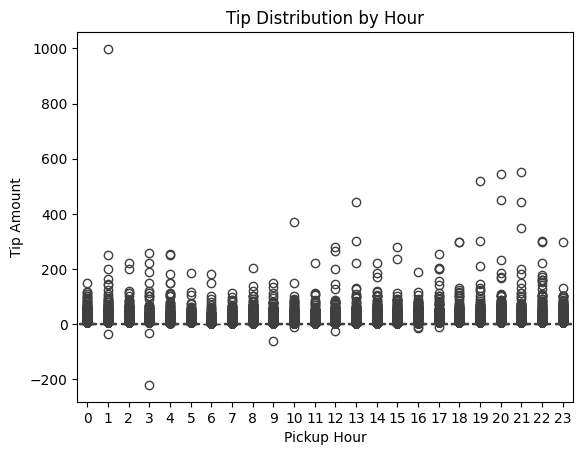

In [19]:
plt.figure()
sns.boxplot(x="pickup_hour", y="tip_amount", data=df)
plt.xlabel("Pickup Hour")
plt.ylabel("Tip Amount")
plt.title("Tip Distribution by Hour")
plt.show()


In [ ]:

kpi_summary = {
    "total_revenue": round(total_revenue, 2),
    "average_fare": round(avg_fare, 2),
    "average_trip_distance": round(avg_distance, 2),
    "average_tip_percentage": round(avg_tip_pct, 2),
    "average_revenue_per_mile": round(avg_revenue_per_mile, 2),
    
    "peak_hour_trips": len(peak_hours),
    "off_peak_hour_trips": len(off_peak_hours),
    "busiest_hour": int(trips_per_hour.idxmax()),
    "highest_revenue_day": daily_revenue.index[0].strftime('%Y-%m-%d'),
    
    "peak_avg_fare": round(peak_hours['total_amount'].mean(), 2),
    "off_peak_avg_fare": round(off_peak_hours['total_amount'].mean(), 2),
    "high_value_trip_count": len(df[df["total_amount"] > 100])
}

kpi_df = pd.DataFrame([kpi_summary])
kpi_df.to_csv("../outputs/kpi_summary.csv", index=False)
